## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [21]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor
import warnings

In [26]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
X = df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [10]:
y = df['math_score']

In [11]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
X.shape

(1000, 19)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7088
- Mean Absolute Error: 4.5177
- R2 Score: 0.8554
-----------------------

### Results

In [28]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,AdaBoost Regressor,0.852548
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.851454
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.784030
4,Decision Tree,0.746629


## Linear Regression

In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

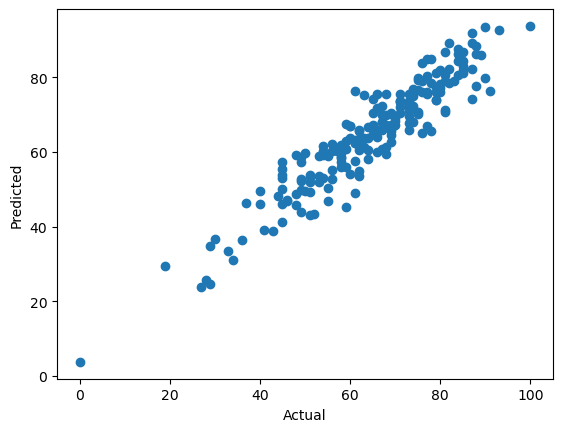

In [30]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

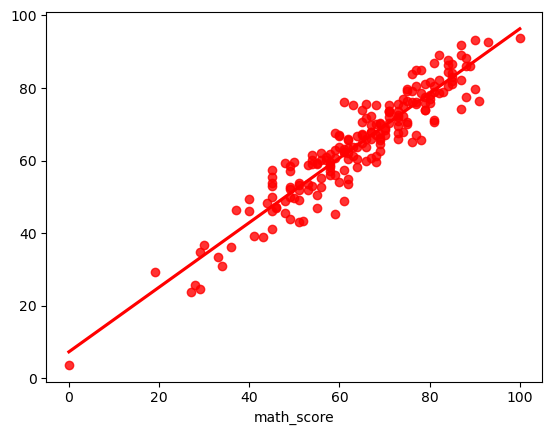

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [32]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287


In [40]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('data/raw.csv')

# Separate features (X) and target variable (y)
X = df.drop('math_score', axis=1)  # Assuming 'math_score' is the target variable
y = df['math_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)


    # Calculate residuals
    residuals = y_test - y_pred
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")


Linear Regression: Mean Squared Error = 29.095169866715484
Ridge Regression: Mean Squared Error = 29.056601626694807
Lasso Regression: Mean Squared Error = 42.47556715227398
ElasticNet Regression: Mean Squared Error = 63.06323110833402
Decision Tree Regression: Mean Squared Error = 59.03
Random Forest Regression: Mean Squared Error = 36.81332434722222


Scatter plots for each subject (math, reading, writing) comparing the actual scores with the predicted scores for each regression model. Each subplot represents one subject, and the red dashed line represents the perfect prediction (where actual score equals predicted score).

Linear Regression: Mean Squared Error = 29.095169866715484


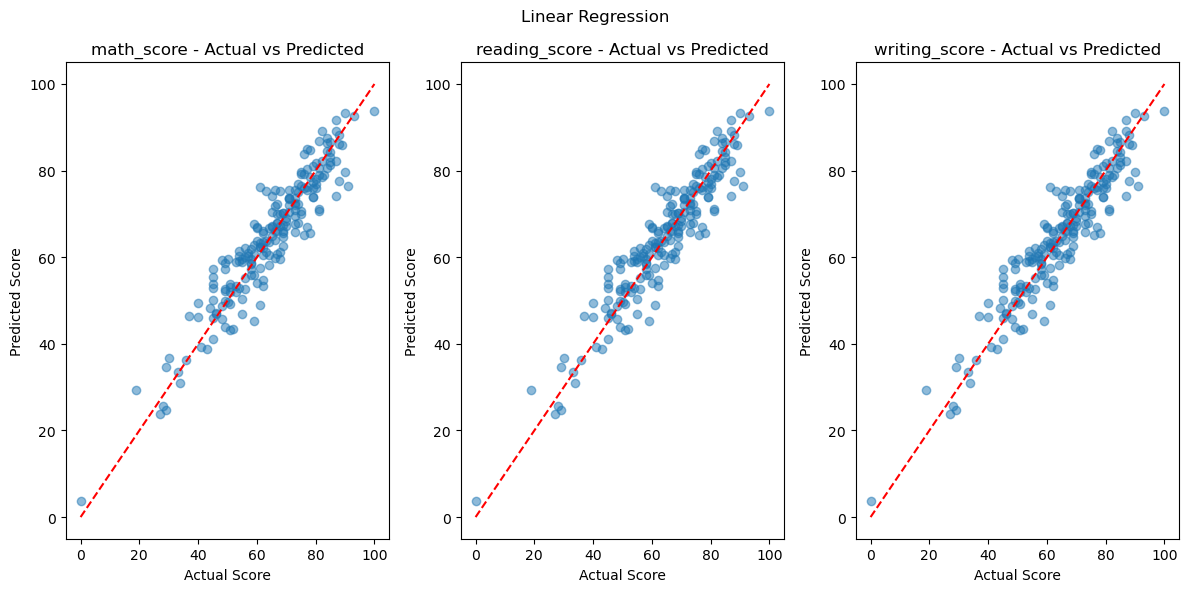

C:\Users\SULEMAN\anaconda3\envs\test2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


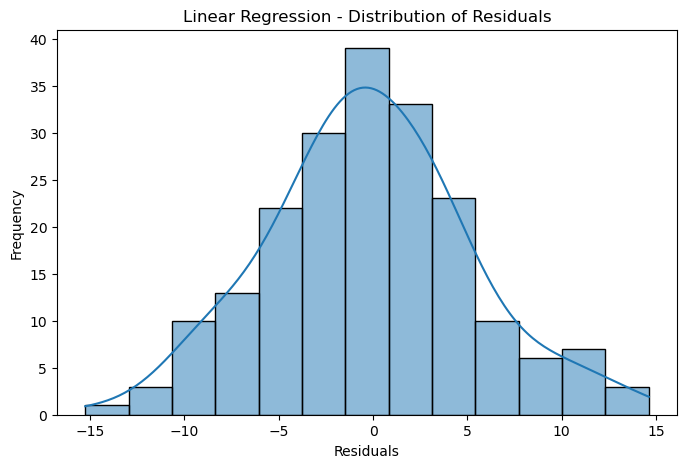

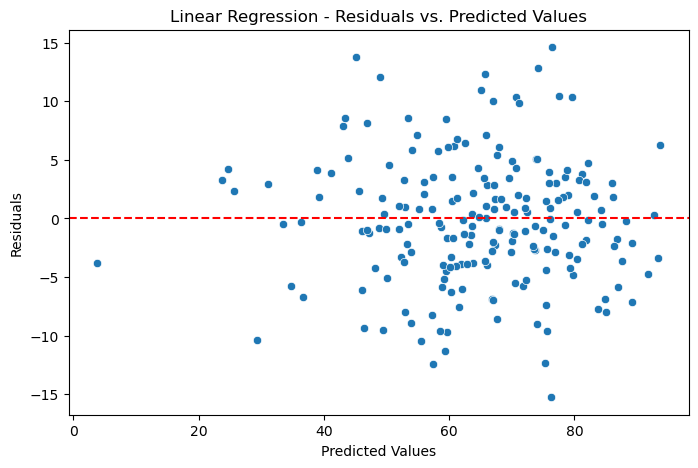

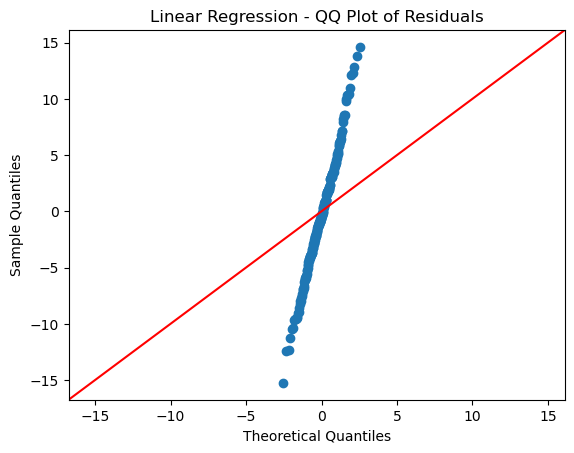

Ridge Regression: Mean Squared Error = 29.056601626694807


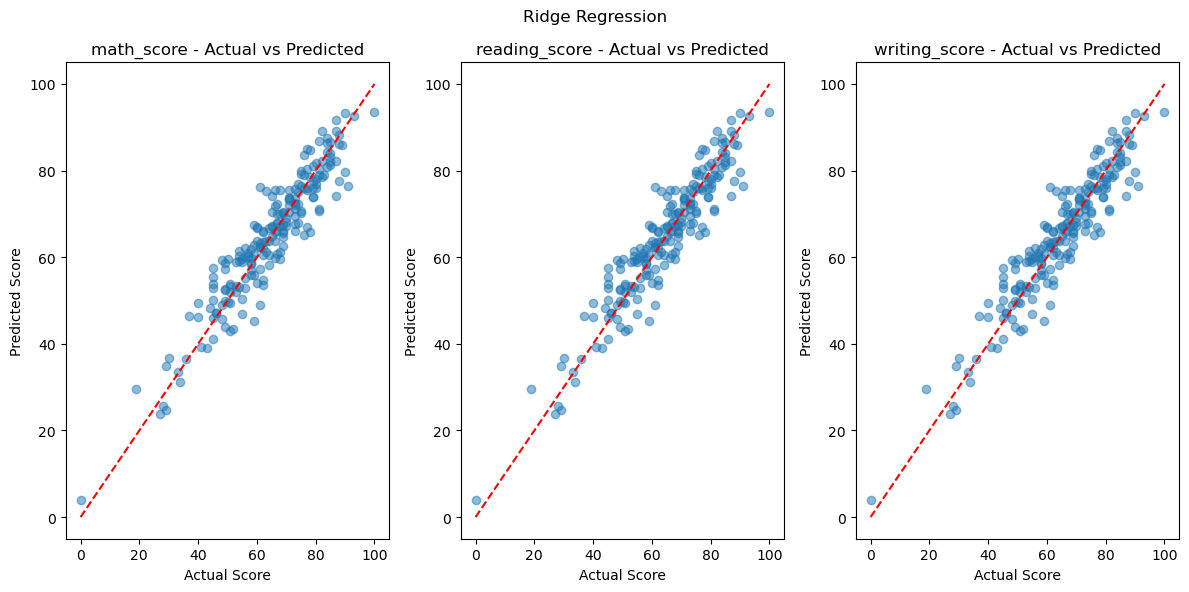

C:\Users\SULEMAN\anaconda3\envs\test2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


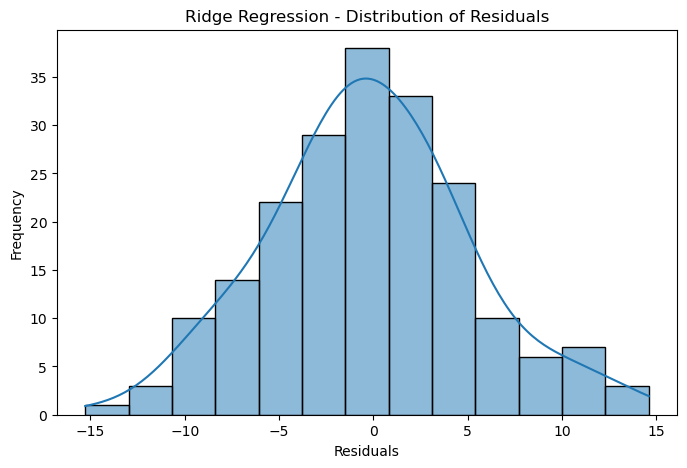

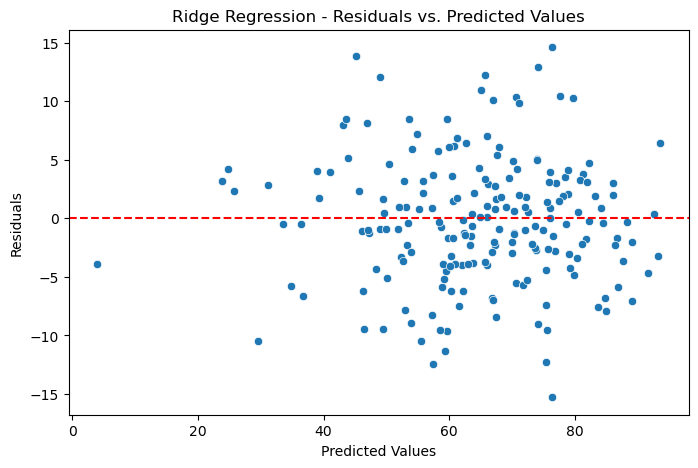

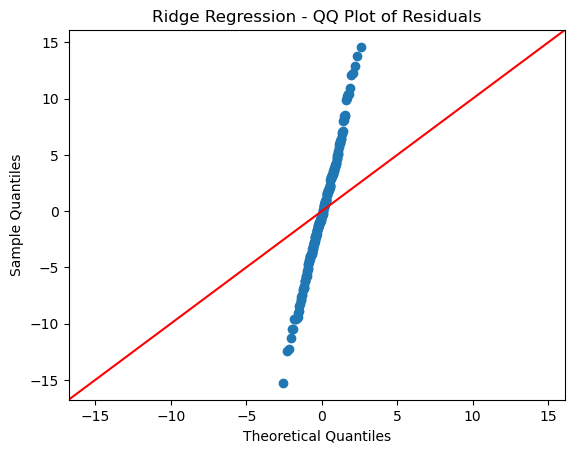

Lasso Regression: Mean Squared Error = 42.47556715227398


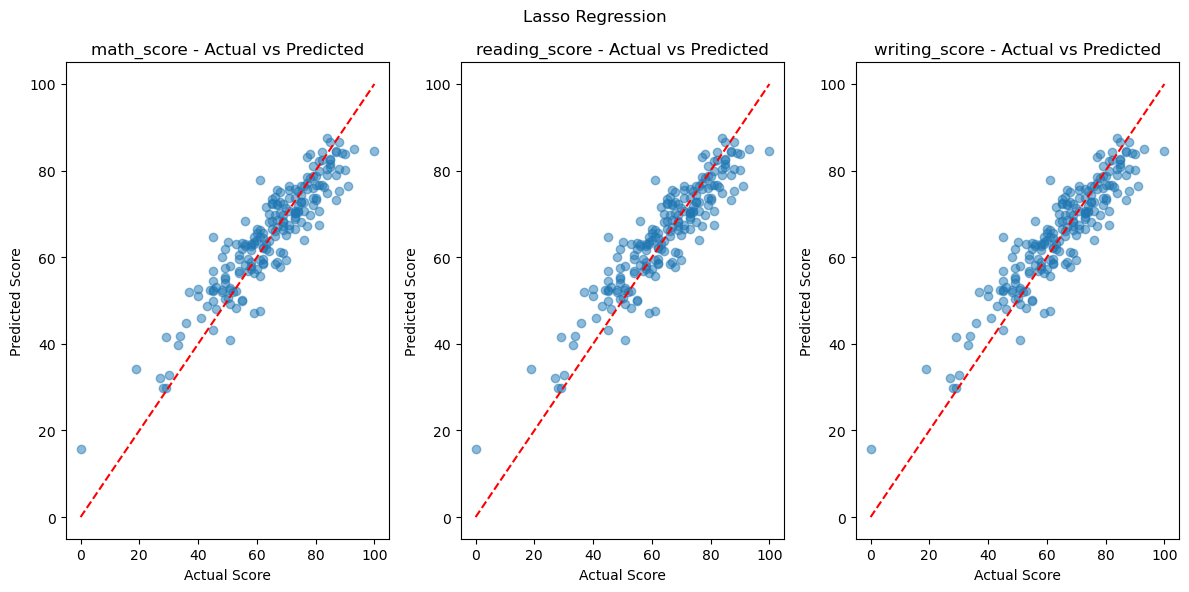

C:\Users\SULEMAN\anaconda3\envs\test2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


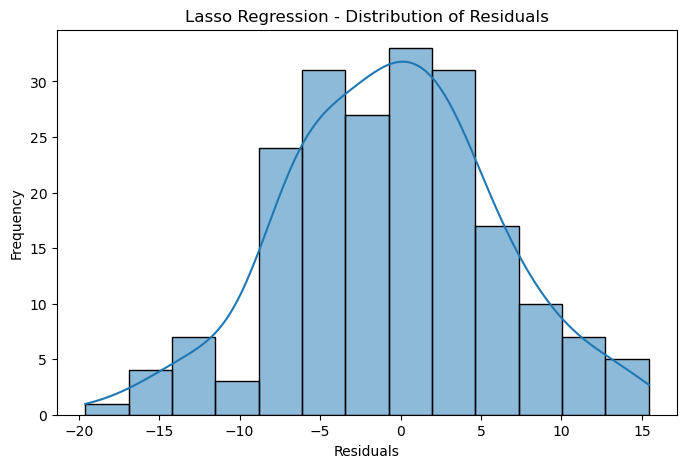

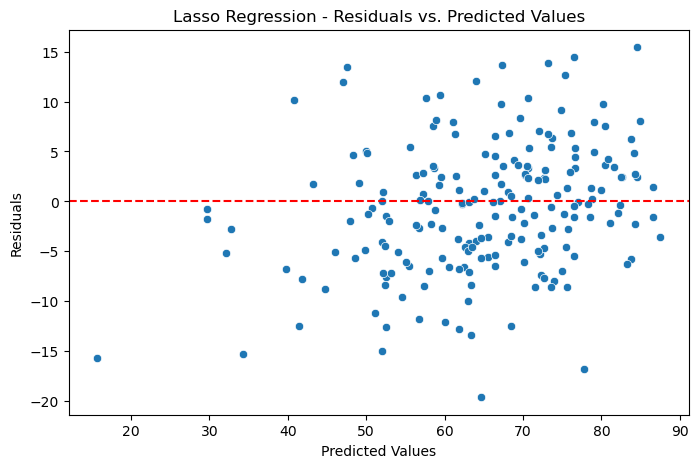

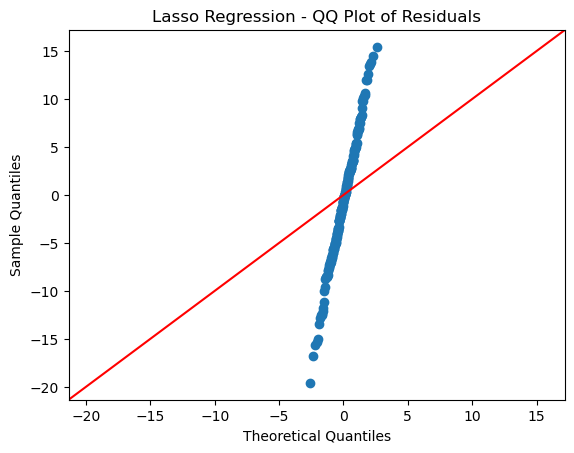

ElasticNet Regression: Mean Squared Error = 63.06323110833402


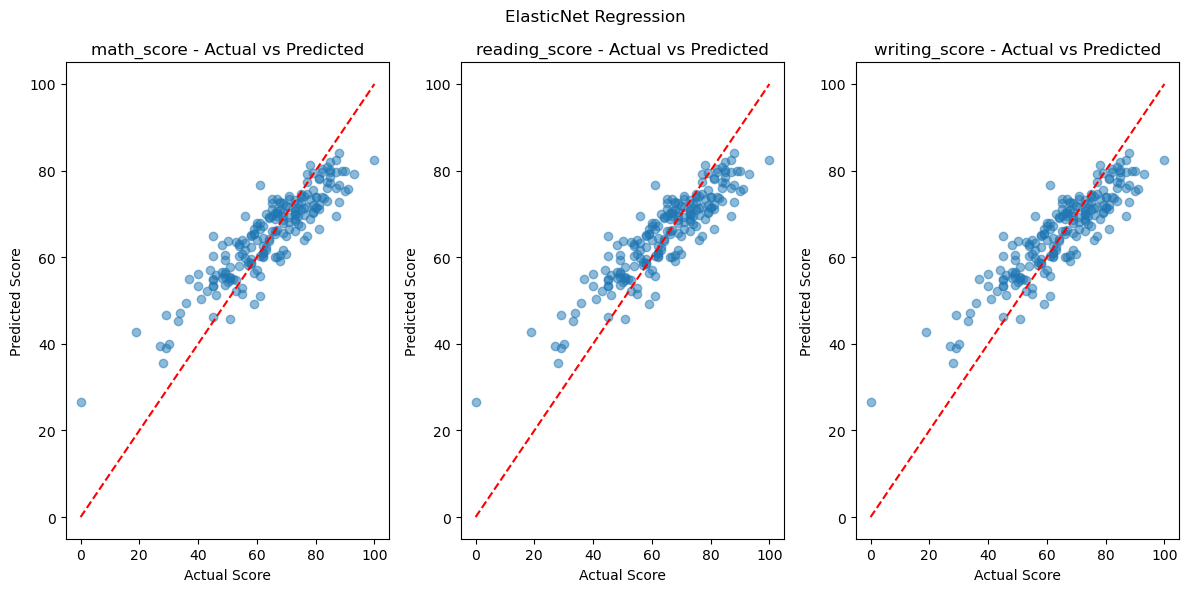

C:\Users\SULEMAN\anaconda3\envs\test2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


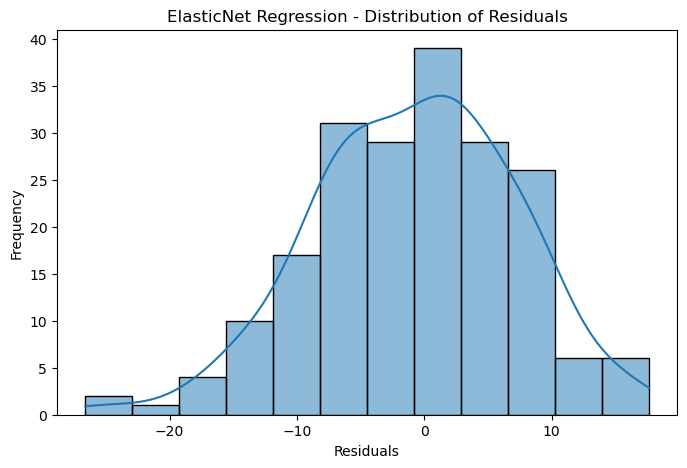

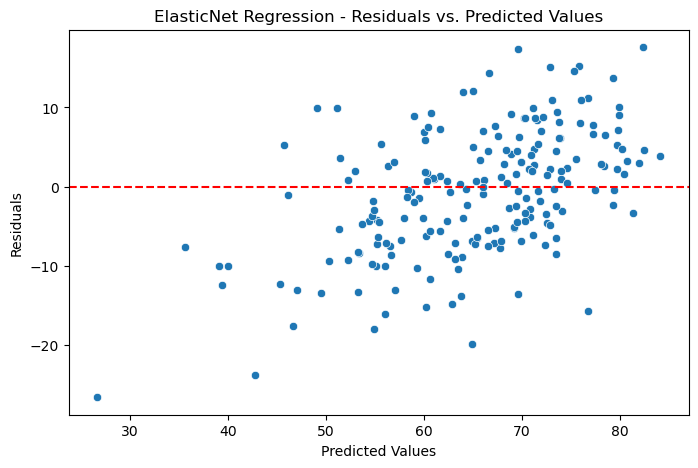

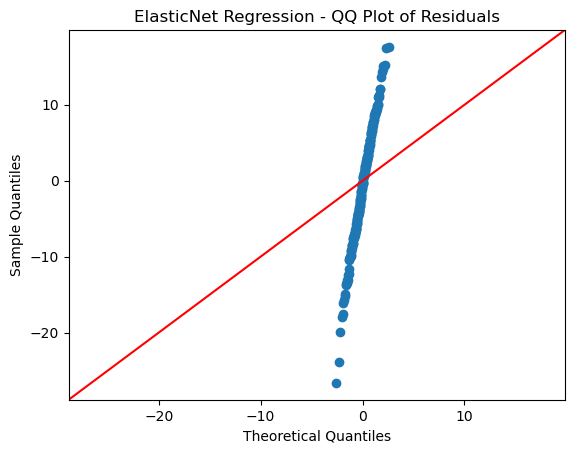

Decision Tree Regression: Mean Squared Error = 60.61


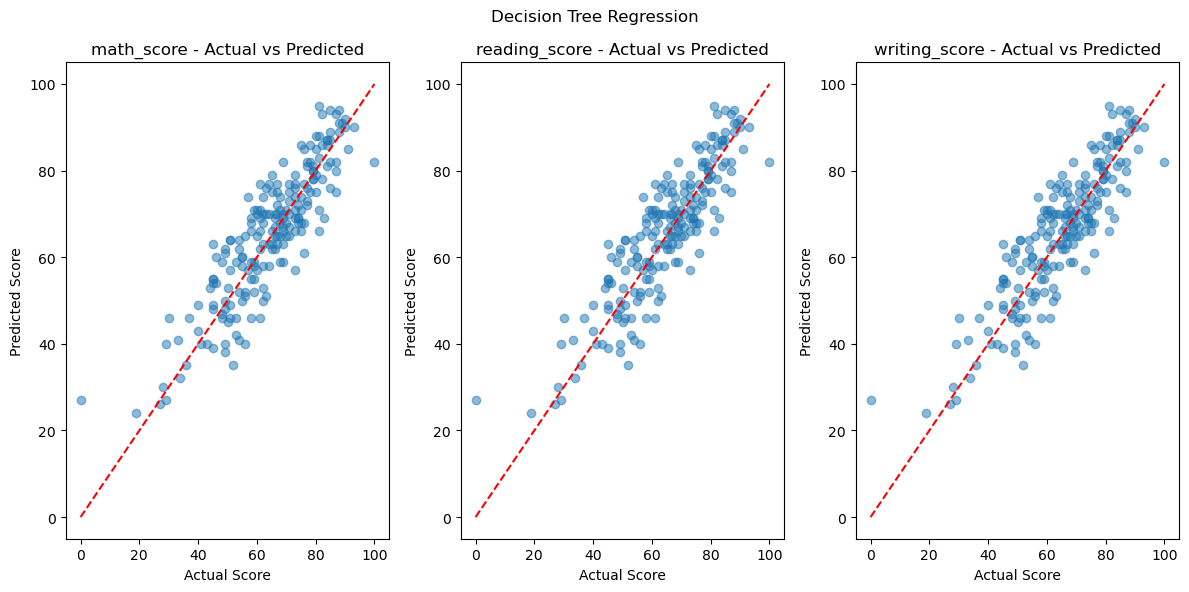

C:\Users\SULEMAN\anaconda3\envs\test2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


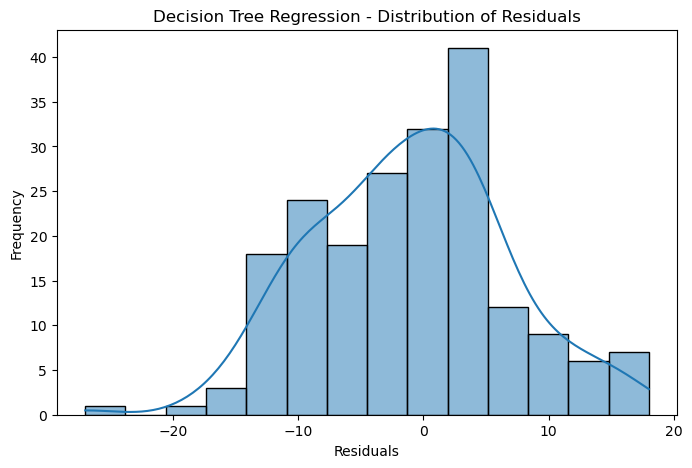

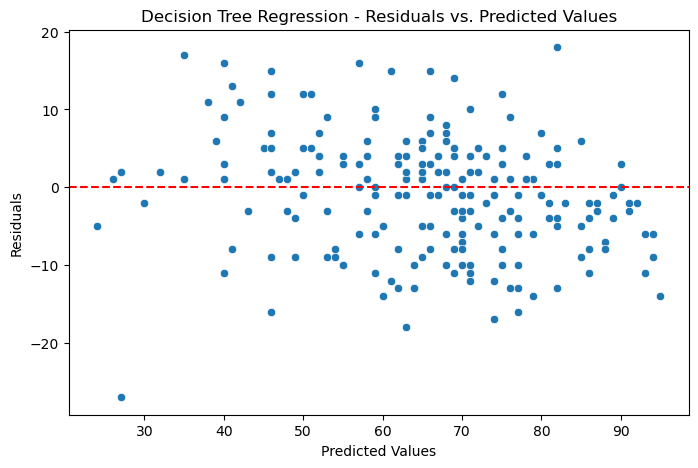

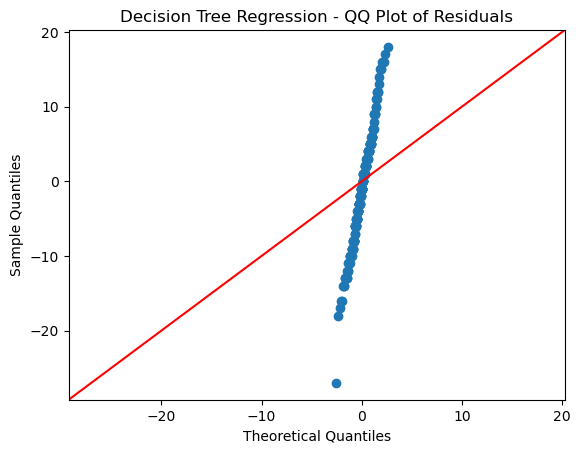

Random Forest Regression: Mean Squared Error = 36.87899045171958


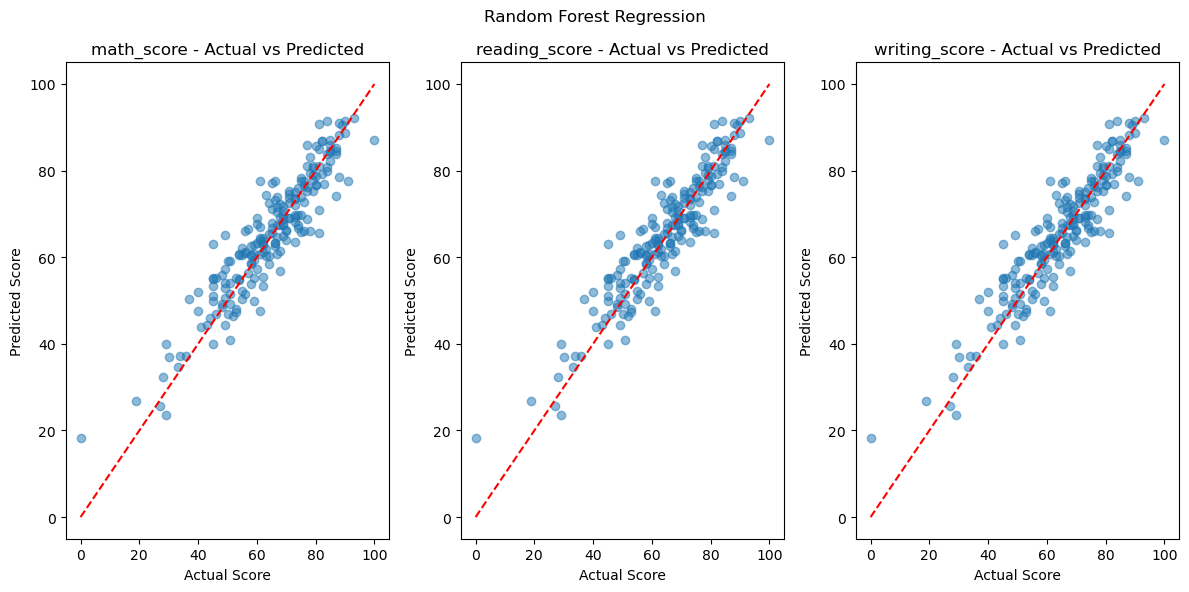

C:\Users\SULEMAN\anaconda3\envs\test2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


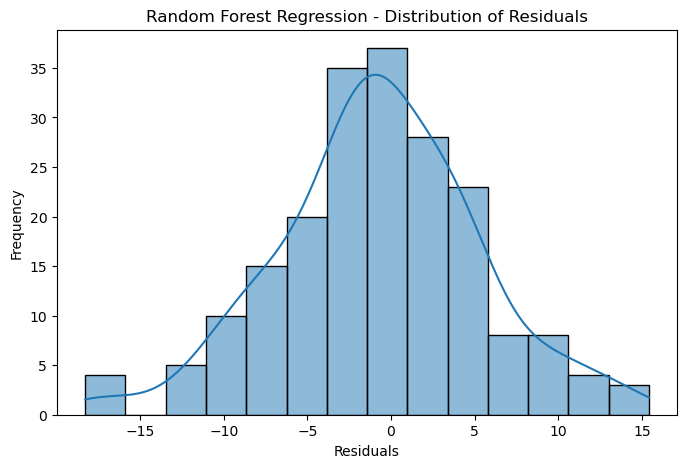

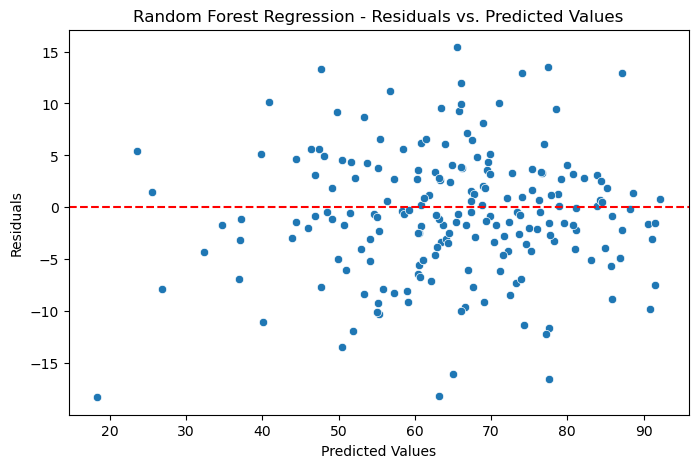

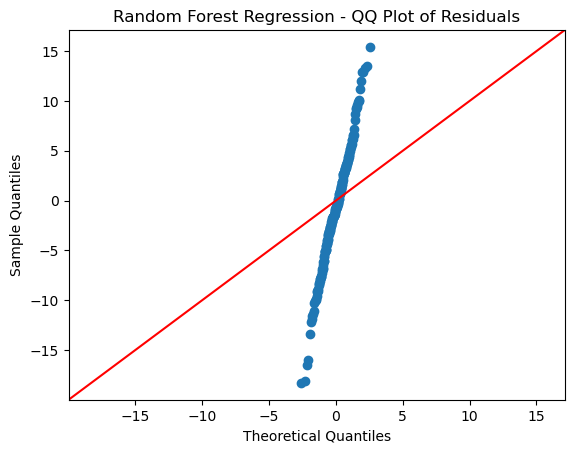

In [49]:
import statsmodels.api as sm
import scipy.stats as stats

# Train and evaluate each model
for name, model in models.items():
    # Create pipeline with preprocessor and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")
    
    # Scatter plot of actual vs predicted scores for each subject
    plt.figure(figsize=(12, 6))
    for i, subject in enumerate(['math_score', 'reading_score', 'writing_score']):
        plt.subplot(1, 3, i + 1)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
        plt.xlabel('Actual Score')
        plt.ylabel('Predicted Score')
        plt.title(f'{subject} - Actual vs Predicted')
    plt.suptitle(f'{name}')
    plt.tight_layout()
    plt.show()
    
    # Distribution of residuals
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, kde=True)
    plt.title(f'{name} - Distribution of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    # Residuals vs. Predicted Values Plot
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} - Residuals vs. Predicted Values')
    plt.show()
    
    # Residuals vs. Independent Variables Plot
    X_test_transformed = preprocessor.transform(X_test)
    sm.qqplot(residuals, line ='45')
    plt.title(f'{name} - QQ Plot of Residuals')
    plt.show()


Conclusion:
Preprocessing:
In this project, we began by preprocessing the dataset, which involved handling missing values, checking for duplicates, and converting categorical variables into numerical format using techniques such as one-hot encoding. Exploratory data analysis (EDA) was performed to gain insights into the distribution of variables and identify potential correlations between them.

Modeling:
After preprocessing the data, we built several regression models to predict students' test scores based on various factors such as gender, ethnicity, parental education level, lunch quality, and test preparation participation. We experimented with linear regression, decision tree regression, random forest regression, and gradient boosting regression algorithms to find the best-performing model.

Evaluation:
The performance of each model was evaluated using metrics such as mean squared error (MSE), mean absolute error (MAE), and R-squared score. Cross-validation techniques were employed to ensure the robustness of the models and mitigate overfitting.

Deployment:
Once the best-performing model was identified, we deployed it using Flask, a lightweight web framework for Python. The model was wrapped in a web application interface, allowing users to input student characteristics and receive predicted test scores in real-time. The deployment process involved creating routes, designing HTML templates for the user interface, and configuring the server to handle HTTP requests.

Future Work:
While this project has provided valuable insights into the factors influencing students' test performance and demonstrated the deployment of a predictive model using Flask, there are several avenues for future exploration:

Feature engineering: Further feature engineering techniques could be explored to create additional predictive variables and improve model performance.

Model optimization: Hyperparameter tuning and ensemble learning techniques could be applied to further enhance the accuracy of the predictive models.

User feedback: Collecting feedback from users of the deployed web application and iteratively improving its usability and functionality based on their input.

Conclusion:

In conclusion, this project has demonstrated the application of machine learning techniques to predict students' test scores and the deployment of a predictive model using Flask. By leveraging data preprocessing, modeling, evaluation, and deployment techniques, we have created a valuable tool for stakeholders in the education sector to gain insights into the factors influencing academic performance and make data-driven decisions to support student success.

